In [103]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [104]:
data=pd.read_csv("car data.csv")

In [105]:
data.shape

(301, 9)

In [106]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [107]:
data.info() #from the output we can conclude that there are no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [108]:
data.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [109]:
data.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [110]:
data.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [111]:
data.Selling_type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [112]:
#encoding categorial
encoder=LabelEncoder()
data.Transmission=encoder.fit_transform(data.Transmission)
data.Selling_type=encoder.fit_transform(data.Selling_type)
data.Fuel_Type=encoder.fit_transform(data.Fuel_Type)
data.Car_Name=encoder.fit_transform(data.Car_Name)

In [113]:
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0
5,95,2018,9.25,9.83,2071,1,0,1,0
6,68,2015,6.75,8.12,18796,2,0,1,0
7,91,2015,6.50,8.61,33429,1,0,1,0
8,68,2016,8.75,8.89,20273,1,0,1,0
9,68,2015,7.45,8.92,42367,1,0,1,0


In [114]:
data.shape

(301, 9)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    int32  
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    int32  
 6   Selling_type   301 non-null    int32  
 7   Transmission   301 non-null    int32  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int32(4), int64(3)
memory usage: 16.6 KB


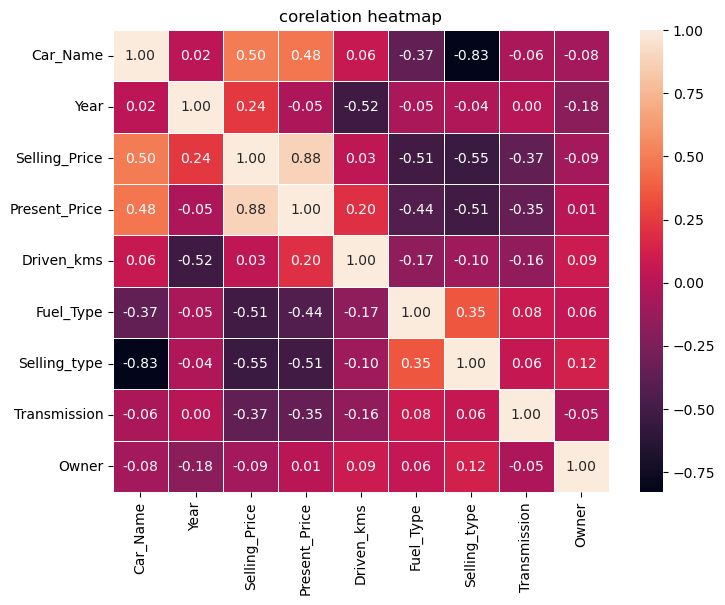

In [116]:
corelation_matrix=data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corelation_matrix,annot=True,fmt=".2f",linewidths=0.5)
plt.title("corelation heatmap")
plt.show()

In [117]:
#identifying outliers in car name
data[data["Car_Name"]>(data.Car_Name.mean()+3*data.Car_Name.std())] #no outliers present

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner


In [118]:
#identifying and removing outliers in Selling price
data[data["Selling_Price"]>(data.Selling_Price.mean()+3*data.Selling_Price.std())]
data=data[data["Selling_Price"]<=(data.Selling_Price.mean()+3*data.Selling_Price.std())]

In [119]:
#identifying outliers in year
data[data["Year"]>(data.Year.mean()+3*data.Year.std())]  #no outliers present

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner


In [120]:
#identifying and removing outliers in present price
data[data["Present_Price"]>(data.Present_Price.mean()+3*data.Present_Price.std())]
data=data[data["Present_Price"]<=(data.Present_Price.mean()+3*data.Present_Price.std())]

In [121]:
#identifying and removing outliers in driven kms
data[data["Driven_kms"]>(data.Driven_kms.mean()+3*data.Driven_kms.std())]
data=data[data["Driven_kms"]<=(data.Driven_kms.mean()+3*data.Driven_kms.std())]

In [122]:
#identifying outliers in fuel type
data[data["Fuel_Type"]>(data.Fuel_Type.mean()+3*data.Fuel_Type.std())]  #no outliers present

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner


In [123]:
#identifying outliers in Selling type
data[data["Selling_type"]>(data.Selling_type.mean()+3*data.Selling_type.std())] #no outliers present

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner


In [124]:
#identifying outliers in transmission
data[data["Transmission"]>(data.Transmission.mean()+3*data.Transmission.std())] #no outliers present

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner


In [125]:
#identifying and removing outliers in owner
data[data["Owner"]>(data.Owner.mean()+3*data.Owner.std())] 
data=data[data["Owner"]<=(data.Owner.mean()+3*data.Owner.std())]

In [126]:
data.shape

(275, 9)

In [127]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [128]:
#scaling the data
scaler=StandardScaler()
scaler.fit_transform(data)

array([[ 1.09724428,  0.08679834, -0.19741599, ..., -0.73233384,
         0.32995601,  0.        ],
       [ 1.21704663, -0.26946351,  0.20210649, ..., -0.73233384,
         0.32995601,  0.        ],
       [ 0.21869374,  1.15558391,  0.91553949, ..., -0.73233384,
         0.32995601,  0.        ],
       ...,
       [ 0.25862785, -1.69451093, -0.19741599, ..., -0.73233384,
         0.32995601,  0.        ],
       [ 0.25862785,  1.15558391,  2.1283756 , ..., -0.73233384,
         0.32995601,  0.        ],
       [ 0.13882551,  0.79932205,  0.35906175, ..., -0.73233384,
         0.32995601,  0.        ]])

In [129]:
#splitting the data
y=data.iloc[:,2:3]
x=data.drop(y,axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [130]:
#building and training the model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [131]:
#predicting the model
y_pred=model.predict(x_test)

In [132]:
#evaluvating the model
r2_score(y_test,y_pred)

0.8829392433244664